# 05. XOR 문제 - 다층 퍼셉트론 구현하기
이번 챕터에서는 파이토치를 사용해서 다층 퍼셉트론을 구현하여 XOR 문제를 풀어보는 것을 시도해보겠습니다. 파이토치에서는 앞에서 배운 역전파가 아래의 두 줄의 코드로서 구현됩니다.

## 1. 파이토치로 다층 퍼셉트론 구현하기


In [1]:
import torch
import torch.nn as nn

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed(777)

XOR 문제를 풀기 위한 입력과 출력을 정의해줍니다.



In [3]:
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

이제 다층 퍼셉트론을 설계합니다. 아래는 입력층, 은닉층1, 은닉층2, 은닉층3, 출력층을 가지는 은닉층이 3개인 인공 신경망입니다.



In [34]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), # input_layer = 2, hidden_layer1 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer1 = 10, hidden_layer2 = 10
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), # hidden_layer2 = 10, hidden_layer3 = 10
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True), # hidden_layer3 = 10, output_layer = 1
          nn.Sigmoid()
).to(device)

위 인공 신경망을 그림으로 표현하면 아래와 같습니다.

<img align='left' src='https://wikidocs.net/images/page/61010/ann.PNG'>

이제 비용 함수와 옵타마이저를 선언합니다. nn.BCELoss()는 이진 분류에서 사용하는 크로스엔트로피 함수입니다.



In [35]:
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)  # modified learning rate from 0.1 to 1

총 10,001번의 에포크를 수행합니다. 각 에포크마다 역전파가 수행된다고 보면 되겠습니다.



In [36]:
arr = []
for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X) #forward
    
    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        arr.append(cost.item())
        print(epoch, cost.item())

0 0.7510064840316772
100 0.6931325197219849
200 0.693131685256958
300 0.6931307911872864
400 0.69312983751297
500 0.6931288242340088
600 0.6931278109550476
700 0.6931265592575073
800 0.6931254267692566
900 0.6931241750717163
1000 0.6931227445602417
1100 0.6931213736534119
1200 0.6931197643280029
1300 0.6931180357933044
1400 0.693116307258606
1500 0.6931142807006836
1600 0.6931121349334717
1700 0.6931098103523254
1800 0.6931072473526001
1900 0.6931044459342957
2000 0.6931012868881226
2100 0.6930980086326599
2200 0.6930941343307495
2300 0.6930899024009705
2400 0.6930851340293884
2500 0.6930798292160034
2600 0.6930738091468811
2700 0.6930668354034424
2800 0.6930588483810425
2900 0.6930496692657471
3000 0.6930389404296875
3100 0.6930262446403503
3200 0.6930110454559326
3300 0.6929927468299866
3400 0.6929703950881958
3500 0.6929424405097961
3600 0.6929070353507996
3700 0.6928611397743225
3800 0.6927998065948486
3900 0.6927151083946228
4000 0.6925932168960571
4100 0.6924077868461609
4200 0.6

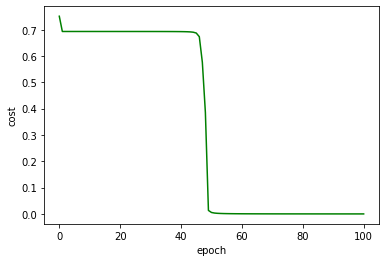

In [40]:
import matplotlib.pyplot as plt

plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(arr, 'g')

plt.show()

***

## 2. 학습된 다층 퍼셉트론의 예측값 확인하기

이제 모델이 XOR 문제를 풀 수 있는지 테스트 해봅시다.



In [53]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().squeeze(-1).cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().squeeze(-1).cpu().numpy())
    print('실제값(Y): ', Y.cpu().squeeze(-1).numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [1.12742426e-04 9.99881148e-01 9.99875903e-01 1.64810976e-04]
모델의 예측값(Predicted):  [0. 1. 1. 0.]
실제값(Y):  [0. 1. 1. 0.]
정확도(Accuracy):  1.0


실제값은 0, 1, 1, 0이며 예측값은 0, 1, 1, 0으로 문제를 해결하는 모습을 보여줍니다.

